In [16]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
#import the train and test data set
train = pd.read_csv(r'E:\All\MPS in Analytics, Northeastern University\Acads\Winter 2021\2nd Term\ALY 6040 Data Mining\Final project dataset\dataset\train.csv')
test = pd.read_csv(r'E:\All\MPS in Analytics, Northeastern University\Acads\Winter 2021\2nd Term\ALY 6040 Data Mining\Final project dataset\dataset\test.csv')

In [18]:
train.shape

(103904, 25)

In [19]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [20]:
train=train.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)
test=test.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)

In [21]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [22]:
train.shape

(103904, 22)

In [24]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [26]:
test.shape

(25976, 22)

In [27]:
# Filtering all Categorical variables
vars_categorical = list(train.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [28]:
le=LabelEncoder()
train["Gender"]=le.fit_transform(train["Gender"])
train["Customer Type"]=le.fit_transform(train['Customer Type'])
train["Type of Travel"]=le.fit_transform(train["Type of Travel"])
train["Class"]=le.fit_transform(train["Class"])
train["satisfaction"]=le.fit_transform(train["satisfaction"])

In [29]:
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [30]:
# Filtering all Categorical variables

vars_categorical = list(test.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [31]:
le=LabelEncoder()
test["Gender"]=le.fit_transform(test["Gender"])
test["Customer Type"]=le.fit_transform(test['Customer Type'])
test["Type of Travel"]=le.fit_transform(test["Type of Travel"])
test["Class"]=le.fit_transform(test["Class"])
test["satisfaction"]=le.fit_transform(test["satisfaction"])

In [32]:
test.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,1
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0
3,1,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,1


In [35]:
#removing the unwated features from the list and keeping remaining
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [37]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,25
1,1,1,25,0,0,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,11
4,1,0,61,0,0,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,2,2,3,1,4,2,3,2,3
103900,1,0,49,0,0,2347,4,4,4,4,...,4,5,5,5,5,5,5,5,4,0
103901,1,1,30,0,0,1995,1,1,1,3,...,1,5,4,3,2,4,5,5,4,7
103902,0,1,22,0,1,1000,1,1,1,5,...,1,1,1,4,5,1,5,4,1,0


In [39]:
# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

def run_model( model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy: " + str(acc))
    roc_aucc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_aucc))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d") 
    
    # Printing ROC curve
  
    fpr, tpr,  threshold = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw=1
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return model,roc_aucc,acc

<b>ANN</b>

In [43]:
#Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU
from tensorflow.keras import backend as K

In [45]:
model = Sequential()
model.add(Dense(128, input_dim=21, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(64, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(32, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(16, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(8, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 13,825
Trainable params: 13,825
Non-trainable params: 0
__________________________________________________

In [47]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
X_train.shape

(103904, 21)

In [52]:
epochs_hist=model.fit(X_train_scaled, y_train, epochs=5, batch_size=34)

Epoch 1/5
3056/3056 [==============================] - 58s 19ms/step - loss: 0.0789 - accuracy: 0.9655
Epoch 2/5
3056/3056 [==============================] - 59s 19ms/step - loss: 0.0776 - accuracy: 0.9660
Epoch 3/5
3056/3056 [==============================] - 58s 19ms/step - loss: 0.0766 - accuracy: 0.9669
Epoch 4/5
3056/3056 [==============================] - 42s 14ms/step - loss: 0.0758 - accuracy: 0.9670
Epoch 5/5
3056/3056 [==============================] - 39s 13ms/step - loss: 0.0743 - accuracy: 0.9673


In [53]:
y_pred=model.predict(X_test_scaled)
y_pred

array([[9.9955928e-01],
       [1.0000000e+00],
       [3.0978434e-05],
       ...,
       [5.7881454e-07],
       [1.0000000e+00],
       [3.1335614e-07]], dtype=float32)

In [54]:
# Converting y_pred to binary
y_pred = (y_pred > 0.5)

In [55]:
acc_nn=accuracy_score(y_pred,y_test)
acc_nn

0.9634277794887589

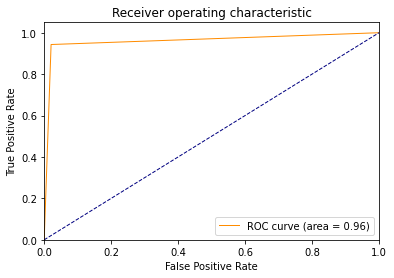

In [56]:
# Printing ROC curve
  
fpr, tpr,  threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw=1
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

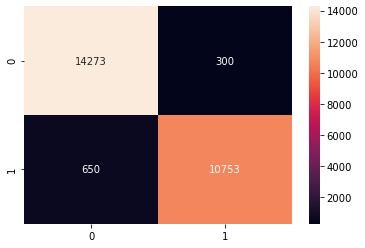

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d") 

In [62]:
print('Accuracy for ANN model:\n{:.3f}\n'.format(acc_nn))

Accuracy for ANN model:
0.963

